In [1]:
import pandas as pd

df = pd.DataFrame([
    ['hot','sunny', 'no'],
    ['hot', 'sunny', 'no' ],
    ['hot', 'overcast', 'yes'],
    ['mild', 'rainy',  'yes'],
    ['cool', 'rainy',  'yes'],
    ['cool', 'rainy', 'no'],
    ['cool', 'overcast', 'yes'],
    ['mild', 'sunny', 'no'],
    ['cool', 'sunny', 'yes'],
    ['mild', 'rainy', 'yes'],
    ['mild', 'sunny', 'yes'],
    ['mild', 'overcast','yes'],
    ['hot', 'overcast', 'yes'],
    ['mild', 'rainy', 'no']])

df.columns = ['temp', 'weather', 'playlabel']
print(df)

    temp   weather playlabel
0    hot     sunny        no
1    hot     sunny        no
2    hot  overcast       yes
3   mild     rainy       yes
4   cool     rainy       yes
5   cool     rainy        no
6   cool  overcast       yes
7   mild     sunny        no
8   cool     sunny       yes
9   mild     rainy       yes
10  mild     sunny       yes
11  mild  overcast       yes
12   hot  overcast       yes
13  mild     rainy        no


In [2]:
weather_mapping = {
    'sunny' : 2,
    'rainy' : 1,
    'overcast' : 0}
df['weather'] = df['weather'].map(weather_mapping)
print(df)

    temp  weather playlabel
0    hot        2        no
1    hot        2        no
2    hot        0       yes
3   mild        1       yes
4   cool        1       yes
5   cool        1        no
6   cool        0       yes
7   mild        2        no
8   cool        2       yes
9   mild        1       yes
10  mild        2       yes
11  mild        0       yes
12   hot        0       yes
13  mild        1        no


In [3]:
import numpy as np

weather_mapping = {label: idx for idx, label in
                  enumerate(np.unique(df['playlabel']))}
print(weather_mapping)

{'no': 0, 'yes': 1}


In [4]:
df['playlabel'] = df['playlabel'].map(weather_mapping)
print(df)

    temp  weather  playlabel
0    hot        2          0
1    hot        2          0
2    hot        0          1
3   mild        1          1
4   cool        1          1
5   cool        1          0
6   cool        0          1
7   mild        2          0
8   cool        2          1
9   mild        1          1
10  mild        2          1
11  mild        0          1
12   hot        0          1
13  mild        1          0


In [5]:
inv_class_mapping = {v: k for k, v in weather_mapping.items()}
df['playlabel'] = df['playlabel'].map(inv_class_mapping)
print(df)

    temp  weather playlabel
0    hot        2        no
1    hot        2        no
2    hot        0       yes
3   mild        1       yes
4   cool        1       yes
5   cool        1        no
6   cool        0       yes
7   mild        2        no
8   cool        2       yes
9   mild        1       yes
10  mild        2       yes
11  mild        0       yes
12   hot        0       yes
13  mild        1        no


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

weather_encoded = le.fit_transform(df['weather'].values)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [7]:
temp_encoded=le.fit_transform(df['temp'].values)
print(temp_encoded)
label=le.fit_transform(df['playlabel'].values)
print(label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [8]:
features=list(zip(weather_encoded,temp_encoded))

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(features, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
predicted= model.predict([[0,2]])   # 0 : Overcast, 2 : Mild
print(predicted)

[1]


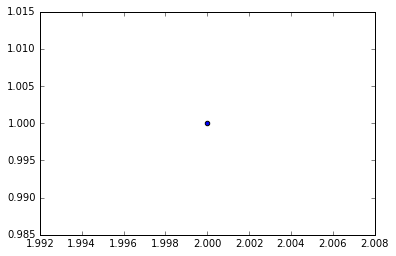

In [13]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(weather_encoded[1], temp_encoded[2])
plt.show()